# Import the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load that Dataset

In [2]:
data = pd.read_csv("Netflix Userbase.csv")

# Data Exploration

In [3]:
print(data.isnull().sum())

data.drop_duplicates(inplace = True)
data = data.drop(["User ID"],axis = 1)

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [4]:
data = pd.read_csv("Netflix Userbase.csv")

print(data.head())


   User ID Subscription Type  Monthly Revenue   Join Date Last Payment Date  \
0        1             Basic               10  15-01-2022        10-06-2023   
1        2           Premium               15  05-09-2021        22-06-2023   
2        3          Standard               12  28-02-2023        27-06-2023   
3        4          Standard               12  10-07-2022        26-06-2023   
4        5             Basic               10  01-05-2023        28-06-2023   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None


In [6]:
print(data.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


# Data Cleaning & Formatting

In [17]:
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

# Calculate subscription duration
data['Subscription Duration'] = data['Last Payment Date'] - data['Join Date']

# Convert subscription duration to days for analysis
data['Subscription Duration'] = data['Subscription Duration'].dt.days

data.describe()

,User ID,Monthly Revenue,Age,Subscription Duration
count,2500.00000,2500.000000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600,326.102000
std,721.83216,1.686851,7.171778,118.638034
min,1.00000,10.000000,26.000000,-159.000000
25%,625.75000,11.000000,32.000000,247.000000
50%,1250.50000,12.000000,39.000000,331.000000
75%,1875.25000,14.000000,45.000000,401.250000
max,2500.00000,15.000000,51.000000,776.000000


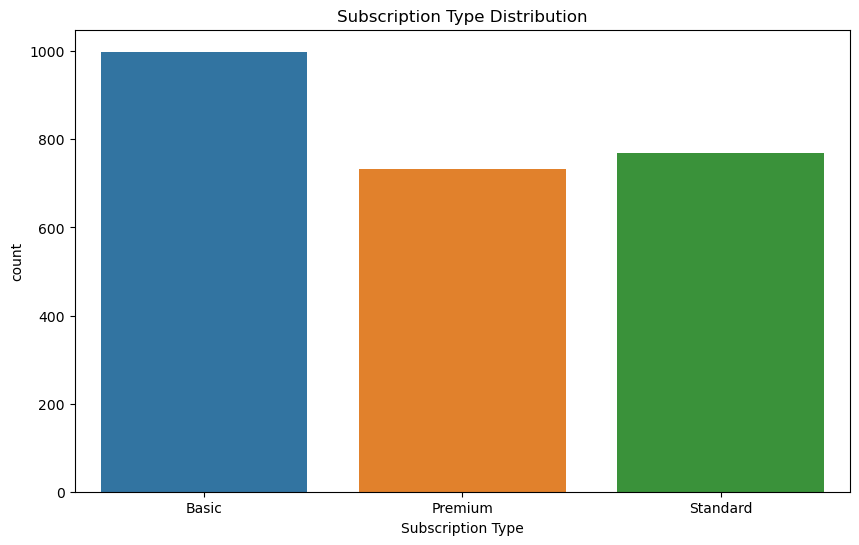

In [7]:
# Subscription Type Distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'Subscription Type', data = data)
plt.title('Subscription Type Distribution')
plt.xlabel = ('Subscription Type')
plt.ylabel = ('Count')
plt.show()

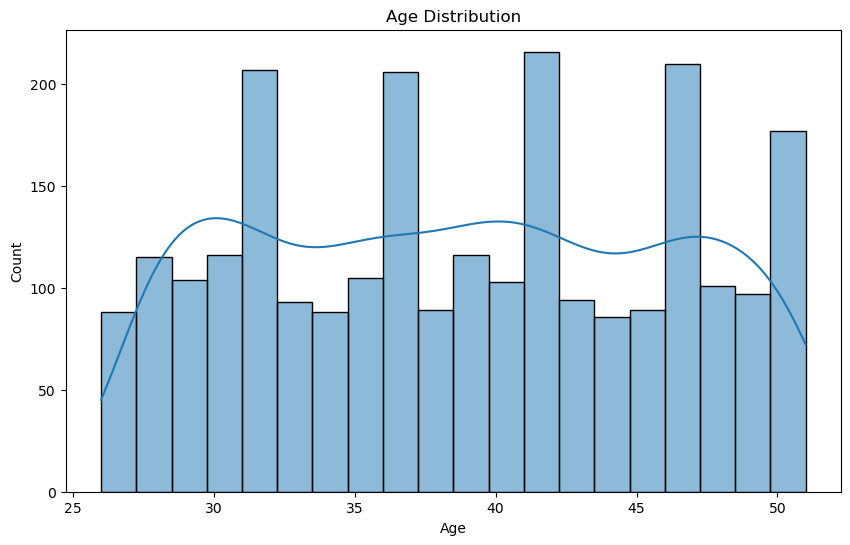

In [8]:
# Age Distibution
plt.figure(figsize = (10,6))
sns.histplot(data['Age'],bins = 20, kde = True)
plt.title('Age Distribution')
plt.xlabel=('Age')
plt.ylabel=('Count')
plt.show()

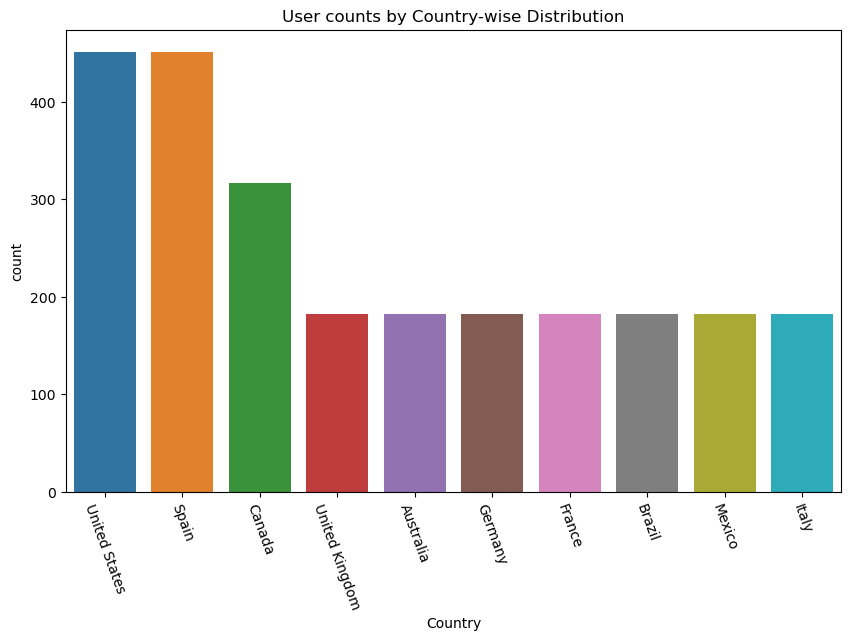

In [9]:
# Country Distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'Country', data = data, order = data['Country'].value_counts().index)
plt.title('User counts by Country-wise Distribution')
plt.xlabel = ('Country')
plt.ylabel = ('Count')
plt.xticks(rotation = 290)
plt.show()

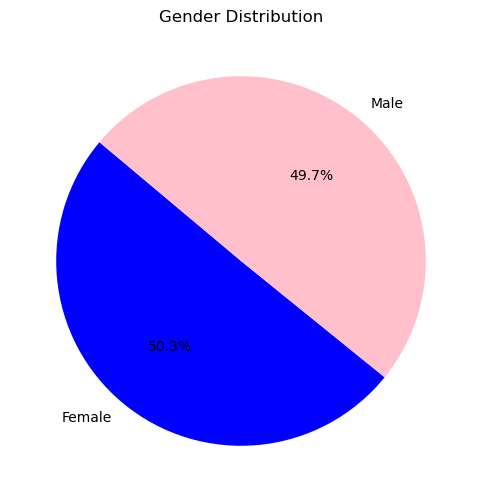

In [10]:
# Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize = (10,6))
plt.pie(gender_counts,labels = gender_counts.index,autopct = '%1.1f%%',startangle = 140, colors = ['Blue','Pink'])
plt.title('Gender Distribution')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9044\1391383039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


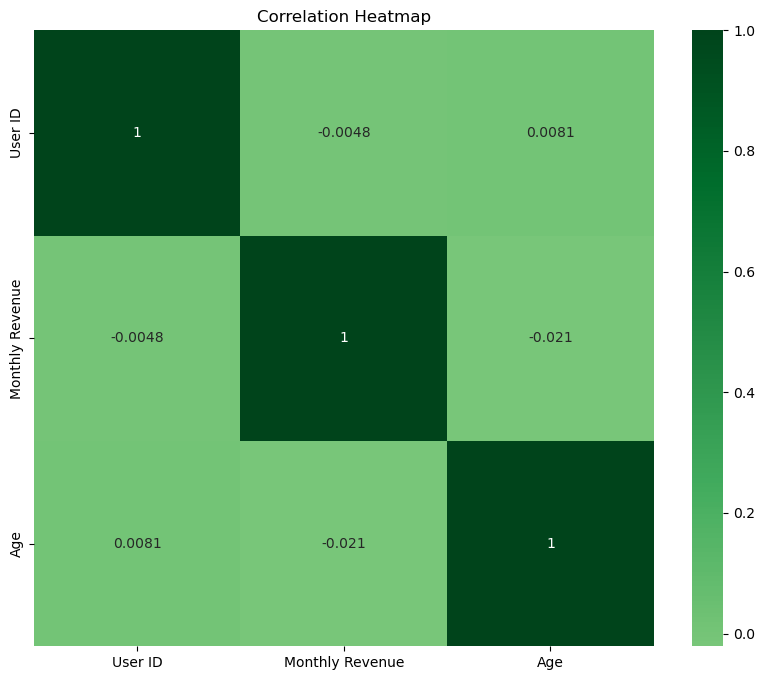

In [14]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', center=0)
plt.title('Correlation Heatmap')
plt.show()


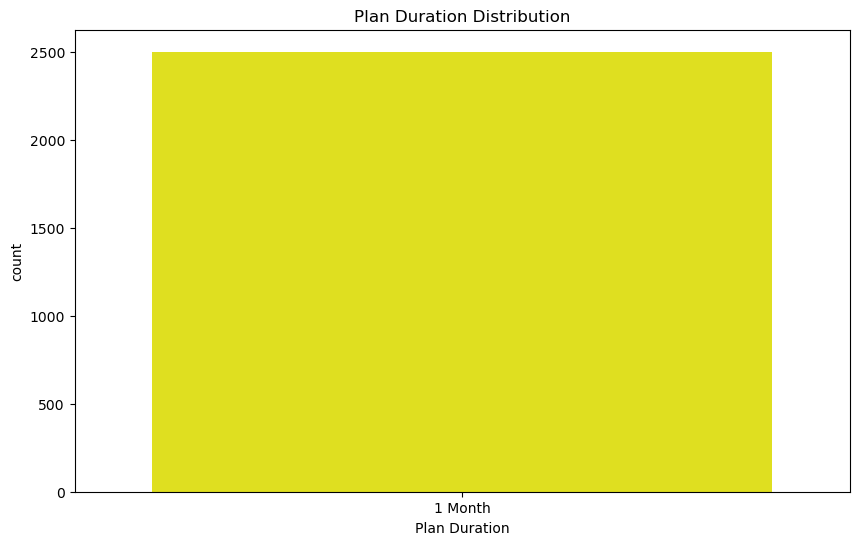

In [12]:
# Plan Duration Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Plan Duration', data=data, color = "yellow")
plt.title('Plan Duration Distribution')
plt.xlabel = ('Plan Duration')
plt.ylabel = ('Count')
plt.show()
